## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


In [ ]:
'''Kayla Akyüz 21726914'''

'''Part 1'''
# Checking if packages are installed
'''
%pip install numpy > null 
%pip install pandas > null
%pip install matplotlib > null
'''


import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

bandwith = 10 # Change these as you wish, I choose bandwith 10 and kValue 100, mostly considering runtime since I was using a bad computer, however very small kValues where inaccurate so I used big one.
kValue = 10 # Even tho I tested with 100 k value etc the result did not change, seems like classes are clustered so result did not change.

classOne = pandas.read_csv('Part1/Class1.csv') # Reading files
classTwo = pandas.read_csv('Part1/Class2.csv')
test = pandas.read_csv('Part1/Test.csv')
ct1 = classOne.transpose().iloc[1:, :] # Transposing for better calculation
ct2 = classTwo.transpose().iloc[1:, :] # First line is dropped since it was index and when transposed it is ghost row

joined_x = pandas.concat([ct1, ct2], axis= 0).reset_index(drop = True) # joining the X s of data and resetting index
ct1_copy = ct1.copy()
ct2_copy = ct2.copy()
ct1_copy["class"] = 1
ct2_copy["class"] = 2 # adding class of data
joined_t = pandas.concat([ct1_copy, ct2_copy], axis= 0).reset_index(drop = True) # getting a everything joined table
ttbT = test.transpose().iloc[1:, :] 
ttb = test.iloc[:, 1:] 

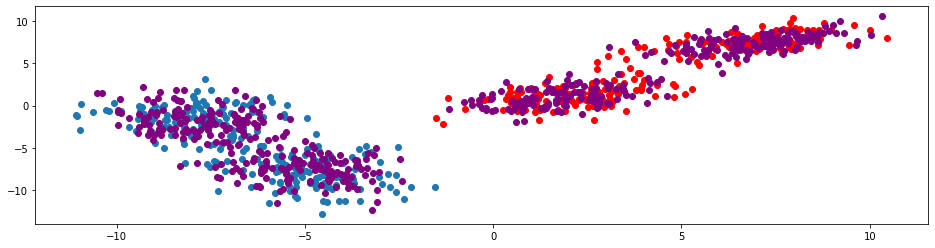

In [71]:
plt.scatter(ct1[0].to_numpy(), ct1[1].to_numpy())
plt.scatter(ct2[0].to_numpy(), ct2[1].to_numpy(), c = "red")
plt.scatter(ttbT[0].to_numpy(), ttbT[1].to_numpy(), c = "purple")

Blue is Class 1 Red is Class 2, Purple is test data. We can observe above graph.

In [ ]:
def DensityKNN(test, class1, class2, k, resultTable):
    
    knnDensitiesC1 = [] 
    knnDensitiesC2 = []
    
    for inde in resultTable.index:
        distanceArray = joined_t.copy() # Distance array initialized for each testSubject.
        distanceArray["Distances"] = -1
        for ind in distanceArray.index: # We calculate ecludian distance of each test subject to each data in class.
            distanceArray.loc[ind, "Distances"] = np.linalg.norm(np.array((resultTable[0][inde], resultTable[1][inde])) - np.array((distanceArray[0][ind],distanceArray[1][ind])))
        distanceArray.sort_values(by='Distances', inplace = True) # Sorting by the distance
        neighbors = distanceArray.iloc[:k, :].reset_index(drop = True) # Getting the k closest elements, neighbours
        c1Count = 0
        c2Count = 0
        for itemi in neighbors.index:
            if neighbors.loc[itemi, "class"] == 1: # Counting and calculating the density of classes in the k elements
                c1Count += 1
            else:
                c2Count += 1
        knnDensitiesC1.append(c1Count/(c1Count+c2Count))
        knnDensitiesC2.append(c2Count/(c1Count+c2Count))
    resultTable["KNNDensityClass1"] = knnDensitiesC1 # Putting out result
    resultTable["KNNDensityClass2"] = knnDensitiesC2
    
    return resultTable

def GaussianKernel(x): # Kernel function for gaussian
    return 1.0/(math.sqrt(2*math.pi))*math.e ** (-0.5 * (x) ** 2)

def DensityParzen(test, class1, class2, bandwith, resultTable):
    
    parzenDensitiesC1 = []
    parzenDensitiesC2 = []
    
    def PPredict(x, classX, bandwith): # For each x in class we calculate sum kernel value of test data
        sumP = 0.0
        NValue = len(classX)
        for ind in classX.index: # For each x in class we get
            temp = GaussianKernel(np.linalg.norm(x-np.array((classX[0][ind],classX[1][ind])))/bandwith)/bandwith # Getting K kernel value of gaussian
            sumP += temp # Summing them up
        return sumP/NValue # returning after diving by N 
    
    for inde in resultTable.index:
        parzenDensitiesC1.append(PPredict(np.array((resultTable[0][inde], resultTable[1][inde])), class1, bandwith))
        parzenDensitiesC2.append(PPredict(np.array((resultTable[0][inde], resultTable[1][inde])), class2, bandwith))
    resultTable["ParzenDensityClass1"] = parzenDensitiesC1
    resultTable["ParzenDensityClass2"] = parzenDensitiesC2
    
    return resultTable

def priors(class1, class2, resultTable):
    
    totalLength = len(class1)+len(class2) # Priors calculated by amount of data in each class divided by total data set
    priorC1 = len(class1)/totalLength
    priorC2 = len(class2)/totalLength
    
    resultTable["PriorClass1"] = priorC1
    resultTable["PriorClass2"] = priorC2
    return resultTable
    
def PredictParzen(ttbT): # After calculating densities making the choice by multipling prior with density and accordingly.
    posteriorPC1 = []
    posteriorPC2 = []
    predictionsP = []
    for ind in ttbT.index:
        ppc1 = ttbT["ParzenDensityClass1"][ind] * ttbT['PriorClass1'][ind]
        ppc2 = ttbT["ParzenDensityClass2"][ind] * ttbT['PriorClass2'][ind]
        posteriorPC1.append(ppc1)
        posteriorPC2.append(ppc2)
        if ppc1 > ppc2: # Higher probiblity is chosen
            predictionsP.append(1)
        else:
            predictionsP.append(2)
    ttbT["ParzenPosteriorC1"] = posteriorPC1
    ttbT["ParzenPosteriorC2"] = posteriorPC2
    ttbT["ParzenPrediction"] = predictionsP
        
def PredictKNN(ttbT): # Making choice for kNN after calculations
    posteriorKC1 = []
    posteriorKC2 = []
    predictionsK = []
    for ind in ttbT.index:
        kpc1 = ttbT["KNNDensityClass1"][ind] * ttbT['PriorClass1'][ind]
        kpc2 = ttbT["KNNDensityClass2"][ind] * ttbT['PriorClass2'][ind]
        posteriorKC1.append(kpc1)
        posteriorKC2.append(kpc2)
        if kpc1 > kpc2:
            predictionsK.append(1)
        else:
            predictionsK.append(2)
    ttbT["KNNPosteriorC1"] = posteriorKC1
    ttbT["KNNPosteriorC2"] = posteriorKC2
    ttbT["KNNPrediction"] = predictionsK

In [2]:
DensityParzen(ttb, ct1, ct2, bandwith, ttbT) # Step 1
DensityKNN(ttb, ct1, ct2, kValue, ttbT) # Step 1
priors(ct1,ct2,ttbT) # Step 2
PredictParzen(ttbT) # Step 3
PredictKNN(ttbT) # Step 3

print(ttbT)
ttbT.to_csv('partOne.csv', header=True, index=False) # Printing to file Step 4


            0         1  ParzenDensityClass1  ParzenDensityClass2  \
0   -3.917456 -8.048795             0.033905             0.014105   
1   -4.760115 -4.991721             0.036254             0.017519   
2   -4.562109 -9.382460             0.032743             0.011597   
3   -7.869898 -6.721477             0.035651             0.011307   
4   -6.328643 -3.673950             0.036675             0.016764   
..        ...       ...                  ...                  ...   
495  0.782546 -0.380385             0.026080             0.031190   
496  1.882841  0.102964             0.023467             0.032702   
497  0.621787  0.296767             0.025629             0.031807   
498  1.970099  3.062402             0.019647             0.035078   
499  2.238670  1.575969             0.021118             0.034417   

     KNNDensityClass1  KNNDensityClass2  PriorClass1  PriorClass2  \
0                 1.0               0.0          0.5          0.5   
1                 1.0            

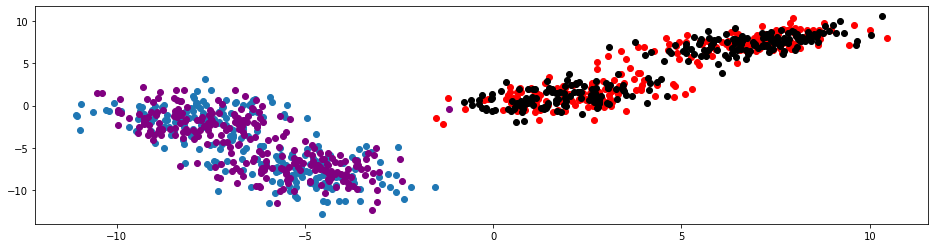

In [73]:
plt.scatter(ct1[0].to_numpy(), ct1[1].to_numpy())
plt.scatter(ct2[0].to_numpy(), ct2[1].to_numpy(), c = "red")
plt.scatter(ttbT[ttbT["ParzenPrediction"] == 1][0].to_numpy(), ttbT[ttbT["ParzenPrediction"] == 1][1].to_numpy(), c = "purple")
plt.scatter(ttbT[ttbT["ParzenPrediction"] == 2][0].to_numpy(), ttbT[ttbT["ParzenPrediction"] == 2][1].to_numpy(), c = "black")

This is parzen prediction visualized, blue is class 1, red is class 2, purple is class 1 prediction, black is class 2 prediction.

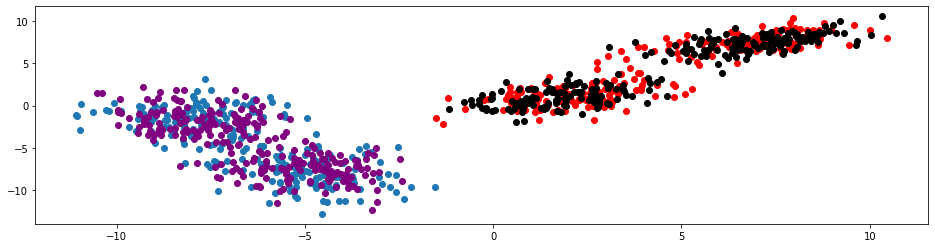

In [74]:
plt.scatter(ct1[0].to_numpy(), ct1[1].to_numpy())
plt.scatter(ct2[0].to_numpy(), ct2[1].to_numpy(), c = "red")
plt.scatter(ttbT[ttbT["KNNPrediction"] == 1][0].to_numpy(), ttbT[ttbT["KNNPrediction"] == 1][1].to_numpy(), c = "purple")
plt.scatter(ttbT[ttbT["KNNPrediction"] == 2][0].to_numpy(), ttbT[ttbT["KNNPrediction"] == 2][1].to_numpy(), c = "black")

This is kNN prediction visualized, blue is class 1, red is class 2, purple is class 1 prediction, black is class 2 prediction.

Looking at our prediction we can see only 1 dot is different, since that dot is in cluster of reds it is obv that kNN will classify as class 2, but parzen window did classsify it as class 1 since the cluster was leaning.

In [3]:
'''Kayla Akyüz 21726914'''

'''Part 2 New Version'''
# Checking if packages are installed
'''
%pip install numpy > null 
%pip install pandas > null
%pip install matplotlib > null
'''
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

train = pandas.read_csv('Part2/train.csv') # Reading files
test = pandas.read_csv('Part2/test.csv')
trainCut = train.iloc[:, 1:] # Transposing for better calculation
testCut = test.iloc[:, 1:] # First line is dropped since it was index and when transposed it is ghost row
X_train = trainCut["0"].to_numpy().reshape([-1,1]) # Sometimes these aliases used a lot for clear reading
Y_train = trainCut["0.1"].to_numpy().reshape([-1,1])
X_test = testCut["0"].to_numpy().reshape([-1,1])
ones = np.ones((X_test.shape[0], 1), dtype=np.float32) # Creating a column of ones of length X
X_testIN = np.concatenate([ones, X_test], axis=1) # Concentrating the column
Y_test = testCut["0.1"].to_numpy().reshape([-1,1])

print(trainCut.shape)

(200, 2)


Looking at the shape we can see 2 features of a given data of 200 samples

In [4]:
print(trainCut.head())

          0         0.1
0  0.036145  103.735650
1 -2.566265  101.733997
2  1.771084  106.044673
3 -1.337349  103.021960
4 -1.698795  101.366718


Here we can see head of our data. Lets do further analysis down below.

In [5]:
print(trainCut.describe())

                0         0.1
count  200.000000  200.000000
mean     0.033855  103.592433
std      1.756681    1.762768
min     -3.000000  100.561213
25%     -1.512048  102.132648
50%      0.144578  103.730215
75%      1.518072  104.994911
max      2.975904  106.549648


Looking at this statistic we realize feature 1 has higher values. They both spread similarly. Feature 0 can take negative values.

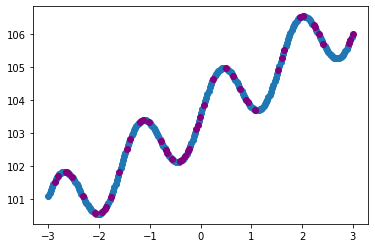

In [6]:
plt.scatter(trainCut["0"].to_numpy(), trainCut["0.1"].to_numpy())
plt.scatter(testCut["0"].to_numpy(), testCut["0.1"].to_numpy(), c = "purple")

This is our data scatter plot. Blue is the training data, purple is test data. Below at trainings you will see pink color which is trained model.

In [61]:
def feature_create(X, degree=1, standart=True):
    """ 
    X: X column of the pandas dataframe.
    degree: An integer value to determine the degree of the generated polynomial function.
    standart: A boolean for scaling the data. Used for avoiding exploding gradients.
    """
    onescolumn = np.ones((X.shape[0], 1), dtype=np.float32) # Creating a column of ones of length X
    X_d = np.concatenate([onescolumn, X.to_numpy().reshape([-1,1])], axis=1) # Concentrating the column
    for i in range(1, degree): # Iterating in the degree
        X_pow = np.power(X.to_numpy(), i + 1).reshape([-1,1]) # Getting power
        
        if standart: # Checking if we need to standardize
            X_pow -= X_pow.mean() # Getting mean
            std = X_pow.std() # Getting std
            if std != 0:
                X_pow /= std # Dividing
        X_d = np.concatenate([X_d, X_pow], axis=1) # Concating the calculated data
    return X_d # Returning features

def ridge(y_true, X, alpha):
    I = np.identity(X.shape[1]) # Calculating the identity matrix
    I[0][0] = 0 # adjusting the first value in I
    XTX_inv = np.linalg.inv(np.matmul(np.transpose(X), X) + alpha * I) # Ridge Regression, adding scaled value
    XTy = np.matmul(np.transpose(X),y_true)
    weights = np.matmul(XTX_inv, XTy)
    return weights

def predict(features, weights):
    return np.matmul(features, weights)

def normal(y_true, X): # Computing normal equation for data, least squares method
    XTX_inv = np.linalg.inv(np.matmul(np.transpose(X), X))
    XTy = np.matmul(np.transpose(X),y_true)
    weights = np.matmul(XTX_inv, XTy)
    return weights

def gradient(X, y_true, lr=0.001, it=3000): # Computing via gradient descent
    weights_gd = np.ones((X.shape[1], 1))
    n = X.shape[0]
    fact = 2 / n
    for _ in range(it):
        y_pred = predict(X, weights_gd)
        grad = fact * np.matmul(np.transpose(X), y_pred-y_true)
        weights_gd -= lr * grad
    return weights_gd

def MSE(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()


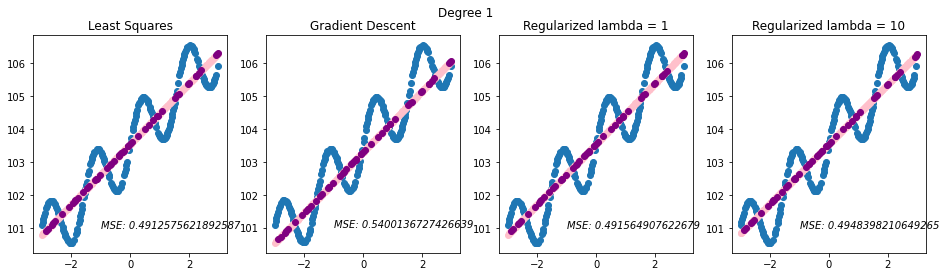

[[103.56134877]
 [  0.91815625]]
[[103.30787002]
 [  0.92229756]]
[[103.5613993 ]
 [  0.91666356]]
[[103.56184684]
 [  0.90344456]]


In [62]:
features = feature_create(trainCut["0"], degree=1, standart=False) # Getting features.
featuresS = feature_create(trainCut["0"], degree=1, standart=True) # Getting features for gradient descent. It is standarized for computability.
weights = normal(Y_train, features) # Weights for Normal Linear Regression
weightsG = gradient(featuresS, Y_train) # Weights for Gradient Descent
weightsR = ridge(Y_train, features, 1) # Weights for Regularized (Ridge) Regression with lamba 1
weightsRT = ridge(Y_train, features, 10) # Weights for Regularized (Ridge) Regression with lamba 10
y_pred = predict(feature_create(testCut["0"], degree=1, standart=False), weights) # Predicting for test datas
y_predG = predict(feature_create(testCut["0"], degree=1, standart=False), weightsG)
y_predR = predict(feature_create(testCut["0"], degree=1, standart=False), weightsR)
y_predRT = predict(feature_create(testCut["0"], degree=1, standart=False), weightsRT)
pred = predict(features, weights) # Making predicts for training data, this way pink colored model is drawn
predG = predict(features, weightsG)
predR = predict(features, weightsR)
predRT = predict(features, weightsRT)

plt.rcParams['figure.figsize'] = [16, 4] # Plotting
plt.suptitle('Degree 1')
# using subplot function and creating plot one
plt.subplot(1, 4, 1)  # row 1, column 2, count 1
plt.scatter(X_train, Y_train)
plt.scatter(X_train, pred, c='pink')
plt.scatter(X_test, y_pred, c='purple')
plt.title('Least Squares')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_pred)),size=10, style='italic', color="black")
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 4, 2)
 
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predG, c='pink')
plt.scatter(X_test, y_predG.T, c='purple')
plt.title('Gradient Descent')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predG)),size=10, style='italic', color="black")

plt.subplot(1, 4, 3)


plt.scatter(X_train, Y_train)
plt.scatter(X_train, predR, c='pink')
plt.scatter(X_test, y_predR.T, c='purple')
plt.title('Regularized lambda = 1')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predR)),size=10, style='italic', color="black")

plt.subplot(1, 4, 4)
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predRT, c='pink')
plt.scatter(X_test, y_predRT.T, c='purple')
plt.title('Regularized lambda = 10')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predRT)),size=10, style='italic', color="black")

# show plot
plt.show()

print(weights) # Printing weights
print(weightsG)
print(weightsR)
print(weightsRT)

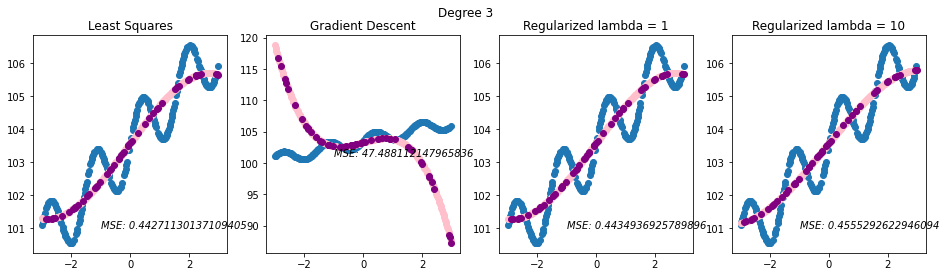

[[ 1.03590830e+02]
 [ 1.20816066e+00]
 [-1.23175356e-02]
 [-5.35802668e-02]]
[[ 1.03295076e+02]
 [ 1.30676390e+00]
 [-3.03053632e-02]
 [-7.29514331e-01]]
[[ 1.03591184e+02]
 [ 1.19570559e+00]
 [-1.23127763e-02]
 [-5.16408792e-02]]
[[ 1.03594045e+02]
 [ 1.09435095e+00]
 [-1.22673405e-02]
 [-3.58641517e-02]]


In [63]:
features = feature_create(trainCut["0"], degree=3, standart=False)
featuresS = feature_create(trainCut["0"], degree=3, standart=True)
weights = normal(Y_train, features)
weightsG = gradient(featuresS, Y_train)
weightsR = ridge(Y_train, features, 1)
weightsRT = ridge(Y_train, features, 10)
y_pred = predict(feature_create(testCut["0"], degree=3, standart=False), weights)
y_predG = predict(feature_create(testCut["0"], degree=3, standart=False), weightsG)
y_predR = predict(feature_create(testCut["0"], degree=3, standart=False), weightsR)
y_predRT = predict(feature_create(testCut["0"], degree=3, standart=False), weightsRT)
pred = predict(features, weights)
predG = predict(features, weightsG)
predR = predict(features, weightsR)
predRT = predict(features, weightsRT)

plt.rcParams['figure.figsize'] = [16, 4]
plt.suptitle('Degree 3')
# using subplot function and creating plot one
plt.subplot(1, 4, 1)  # row 1, column 2, count 1
plt.scatter(X_train, Y_train)
plt.scatter(X_train, pred, c='pink')
plt.scatter(X_test, y_pred, c='purple')
plt.title('Least Squares')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_pred)),size=10, style='italic', color="black")
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 4, 2)
 
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predG, c='pink')
plt.scatter(X_test, y_predG.T, c='purple')
plt.title('Gradient Descent')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predG)),size=10, style='italic', color="black")

plt.subplot(1, 4, 3)


plt.scatter(X_train, Y_train)
plt.scatter(X_train, predR, c='pink')
plt.scatter(X_test, y_predR.T, c='purple')
plt.title('Regularized lambda = 1')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predR)),size=10, style='italic', color="black")

plt.subplot(1, 4, 4)
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predRT, c='pink')
plt.scatter(X_test, y_predRT.T, c='purple')
plt.title('Regularized lambda = 10')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predRT)),size=10, style='italic', color="black")

# show plot
plt.show()

print(weights)
print(weightsG)
print(weightsR)
print(weightsRT)

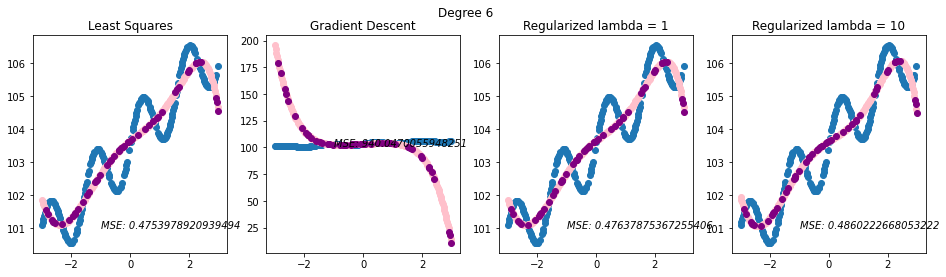

[[ 1.03667049e+02]
 [ 7.19631482e-01]
 [-1.53485136e-01]
 [ 2.01938822e-01]
 [ 4.68401116e-02]
 [-2.57725567e-02]
 [-3.94955530e-03]]
[[ 1.03293038e+02]
 [ 1.33515869e+00]
 [-1.86865067e-02]
 [-4.54422603e-01]
 [-2.22790366e-02]
 [-3.47004337e-01]
 [ 2.58037325e-03]]
[[ 1.03663820e+02]
 [ 7.00160761e-01]
 [-1.47056460e-01]
 [ 2.09476553e-01]
 [ 4.50169872e-02]
 [-2.64177272e-02]
 [-3.81855637e-03]]
[[ 1.03643723e+02]
 [ 5.71765026e-01]
 [-1.06511897e-01]
 [ 2.58219649e-01]
 [ 3.34829677e-02]
 [-3.05413052e-02]
 [-2.98805384e-03]]


In [64]:
features = feature_create(trainCut["0"], degree=6, standart=False)
featuresS = feature_create(trainCut["0"], degree=6, standart=True)
weights = normal(Y_train, features)
weightsG = gradient(featuresS, Y_train)
weightsR = ridge(Y_train, features, 1)
weightsRT = ridge(Y_train, features, 10)
y_pred = predict(feature_create(testCut["0"], degree=6, standart=False), weights)
y_predG = predict(feature_create(testCut["0"], degree=6, standart=False), weightsG)
y_predR = predict(feature_create(testCut["0"], degree=6, standart=False), weightsR)
y_predRT = predict(feature_create(testCut["0"], degree=6, standart=False), weightsRT)
pred = predict(features, weights)
predG = predict(features, weightsG)
predR = predict(features, weightsR)
predRT = predict(features, weightsRT)

plt.rcParams['figure.figsize'] = [16, 4]
plt.suptitle('Degree 6')
# using subplot function and creating plot one
plt.subplot(1, 4, 1)  # row 1, column 2, count 1
plt.scatter(X_train, Y_train)
plt.scatter(X_train, pred, c='pink')
plt.scatter(X_test, y_pred, c='purple')
plt.title('Least Squares')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_pred)),size=10, style='italic', color="black")
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 4, 2)
 
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predG, c='pink')
plt.scatter(X_test, y_predG.T, c='purple')
plt.title('Gradient Descent')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predG)),size=10, style='italic', color="black")

plt.subplot(1, 4, 3)


plt.scatter(X_train, Y_train)
plt.scatter(X_train, predR, c='pink')
plt.scatter(X_test, y_predR.T, c='purple')
plt.title('Regularized lambda = 1')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predR)),size=10, style='italic', color="black")

plt.subplot(1, 4, 4)
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predRT, c='pink')
plt.scatter(X_test, y_predRT.T, c='purple')
plt.title('Regularized lambda = 10')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predRT)),size=10, style='italic', color="black")

# show plot
plt.show()

print(weights)
print(weightsG)
print(weightsR)
print(weightsRT)

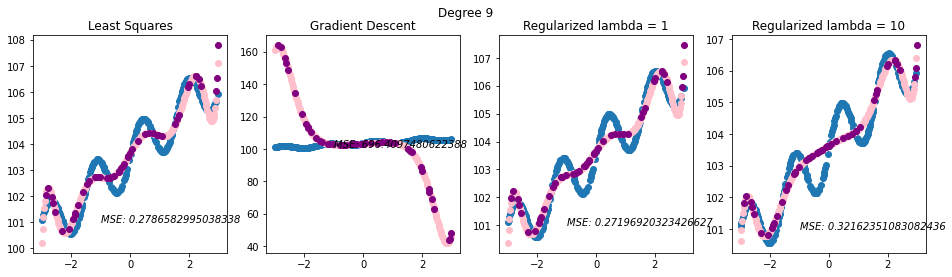

[[ 1.03668394e+02]
 [ 2.02627283e+00]
 [-2.72333522e-01]
 [-2.07387224e+00]
 [ 1.49625563e-01]
 [ 1.00918804e+00]
 [-2.80405324e-02]
 [-1.70250074e-01]
 [ 1.69202424e-03]
 [ 9.18635827e-03]]
[[ 1.03294310e+02]
 [ 1.28472683e+00]
 [ 2.03044041e-03]
 [-3.92015004e-01]
 [-2.41513912e-02]
 [-2.21735175e-01]
 [-1.95498747e-02]
 [-1.09893301e-01]
 [ 2.65794478e-03]
 [ 1.24136559e-02]]
[[ 1.03666805e+02]
 [ 1.53820497e+00]
 [-2.37122154e-01]
 [-1.44931732e+00]
 [ 1.24759833e-01]
 [ 7.73602616e-01]
 [-2.29394758e-02]
 [-1.36125406e-01]
 [ 1.37056345e-03]
 [ 7.50835888e-03]]
[[ 1.03642479e+02]
 [ 5.90081231e-01]
 [-1.06980880e-01]
 [-2.68369034e-01]
 [ 4.49177305e-02]
 [ 3.33112282e-01]
 [-7.62341629e-03]
 [-7.26814957e-02]
 [ 4.50136337e-04]
 [ 4.39842571e-03]]


In [65]:
features = feature_create(trainCut["0"], degree=9, standart=False)
featuresS = feature_create(trainCut["0"], degree=9, standart=True)
weights = normal(Y_train, features)
weightsG = gradient(featuresS, Y_train)
weightsR = ridge(Y_train, features, 1)
weightsRT = ridge(Y_train, features, 10)
y_pred = predict(feature_create(testCut["0"], degree=9, standart=False), weights)
y_predG = predict(feature_create(testCut["0"], degree=9, standart=False), weightsG)
y_predR = predict(feature_create(testCut["0"], degree=9, standart=False), weightsR)
y_predRT = predict(feature_create(testCut["0"], degree=9, standart=False), weightsRT)
pred = predict(features, weights)
predG = predict(features, weightsG)
predR = predict(features, weightsR)
predRT = predict(features, weightsRT)

plt.rcParams['figure.figsize'] = [16, 4]
plt.suptitle('Degree 9')
# using subplot function and creating plot one
plt.subplot(1, 4, 1)  # row 1, column 2, count 1
plt.scatter(X_train, Y_train)
plt.scatter(X_train, pred, c='pink')
plt.scatter(X_test, y_pred, c='purple')
plt.title('Least Squares')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_pred)),size=10, style='italic', color="black")
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 4, 2)
 
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predG, c='pink')
plt.scatter(X_test, y_predG.T, c='purple')
plt.title('Gradient Descent')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predG)),size=10, style='italic', color="black")

plt.subplot(1, 4, 3)


plt.scatter(X_train, Y_train)
plt.scatter(X_train, predR, c='pink')
plt.scatter(X_test, y_predR.T, c='purple')
plt.title('Regularized lambda = 1')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predR)),size=10, style='italic', color="black")

plt.subplot(1, 4, 4)
plt.scatter(X_train, Y_train)
plt.scatter(X_train, predRT, c='pink')
plt.scatter(X_test, y_predRT.T, c='purple')
plt.title('Regularized lambda = 10')
plt.text(-1, 101, 'MSE: '+ str(MSE(Y_test, y_predRT)),size=10, style='italic', color="black")

# show plot
plt.show()

print(weights)
print(weightsG)
print(weightsR)
print(weightsRT)

Fixed the prediction. Purple is test result, pink is trained model, blue is data.

At the end result we can see Regularized with low lamba performs best. For this data high degree model is better, as it is obvious when observed data. Gradient descent is useless other than first degree. High lamba values like 10 also is worse then non regularized. 

Note: Error rates are reported on the graphs. Weights are below graphs.

Kayla Akyüz "21726914"

BBM409

--Assignment 2--